In [143]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import matplotlib.dates as mdates
from matplotlib.gridspec import GridSpec

plt.rcParams['legend.title_fontsize'] = 'large'

import altair as alt
from altair import datum


In [30]:
modeling_df = pd.read_csv("../data/microsimulation_results/scenarios_aware.csv")
modeling_df.head()


,week,Empirical,To.Aware_S0,To.Aware_S1,To.Aware_S2,To.Aware_S3,To.Aware_S4,To.Aware_S5,To.Aware_S6,To.Aware_S7,...,To.Aware_S10,To.Aware_S11,To.Aware_S12,To.Aware_S13,To.Aware_S14,To.Aware_S15,To.Aware_S16,To.Aware_S17,To.Aware_S18,To.Aware_S19
0,0,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0.0,2,2,2,1,2,2,2,2,...,2,1,2,2,2,2,2,2,2,2
2,2,0.0,0,0,0,1,1,1,2,1,...,1,2,0,0,1,1,1,1,1,1
3,3,0.0,0,0,0,1,1,1,1,1,...,2,1,0,0,1,1,1,0,2,1
4,4,3.0,0,0,0,1,1,1,2,1,...,3,1,1,0,1,1,1,1,3,1


In [31]:
start_date = datetime(2023, 3, 1)
modeling_df['week_date'] = modeling_df['week'].apply(lambda x: (start_date + timedelta(weeks=x)).strftime('%Y-%m-%d'))
modeling_df = modeling_df.dropna()
modeling_df.head()

,week,Empirical,To.Aware_S0,To.Aware_S1,To.Aware_S2,To.Aware_S3,To.Aware_S4,To.Aware_S5,To.Aware_S6,To.Aware_S7,...,To.Aware_S11,To.Aware_S12,To.Aware_S13,To.Aware_S14,To.Aware_S15,To.Aware_S16,To.Aware_S17,To.Aware_S18,To.Aware_S19,week_date
0,0,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2023-03-01
1,1,0.0,2,2,2,1,2,2,2,2,...,1,2,2,2,2,2,2,2,2,2023-03-08
2,2,0.0,0,0,0,1,1,1,2,1,...,2,0,0,1,1,1,1,1,1,2023-03-15
3,3,0.0,0,0,0,1,1,1,1,1,...,1,0,0,1,1,1,0,2,1,2023-03-22
4,4,3.0,0,0,0,1,1,1,2,1,...,1,1,0,1,1,1,1,3,1,2023-03-29


/var/folders/h9/0347drb57tsgxzbddmvmlvf80000gp/T/ipykernel_59851/2357449817.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sexual_behavior_long.variable[sexual_behavior_long.variable == "Empirical"] = "Empirical"
/var/folders/h9/0347drb57tsgxzbddmvmlvf80000gp/T/ipykernel_59851/2357449817.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sexual_behavior_long.variable[sexual_behavior_long.variable == "To.Aware_S13"] = "0.7"
/var/folders/h9/0347drb57tsgxzbddmvmlvf80000gp/T/ipykernel_59851/2357449817.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats 

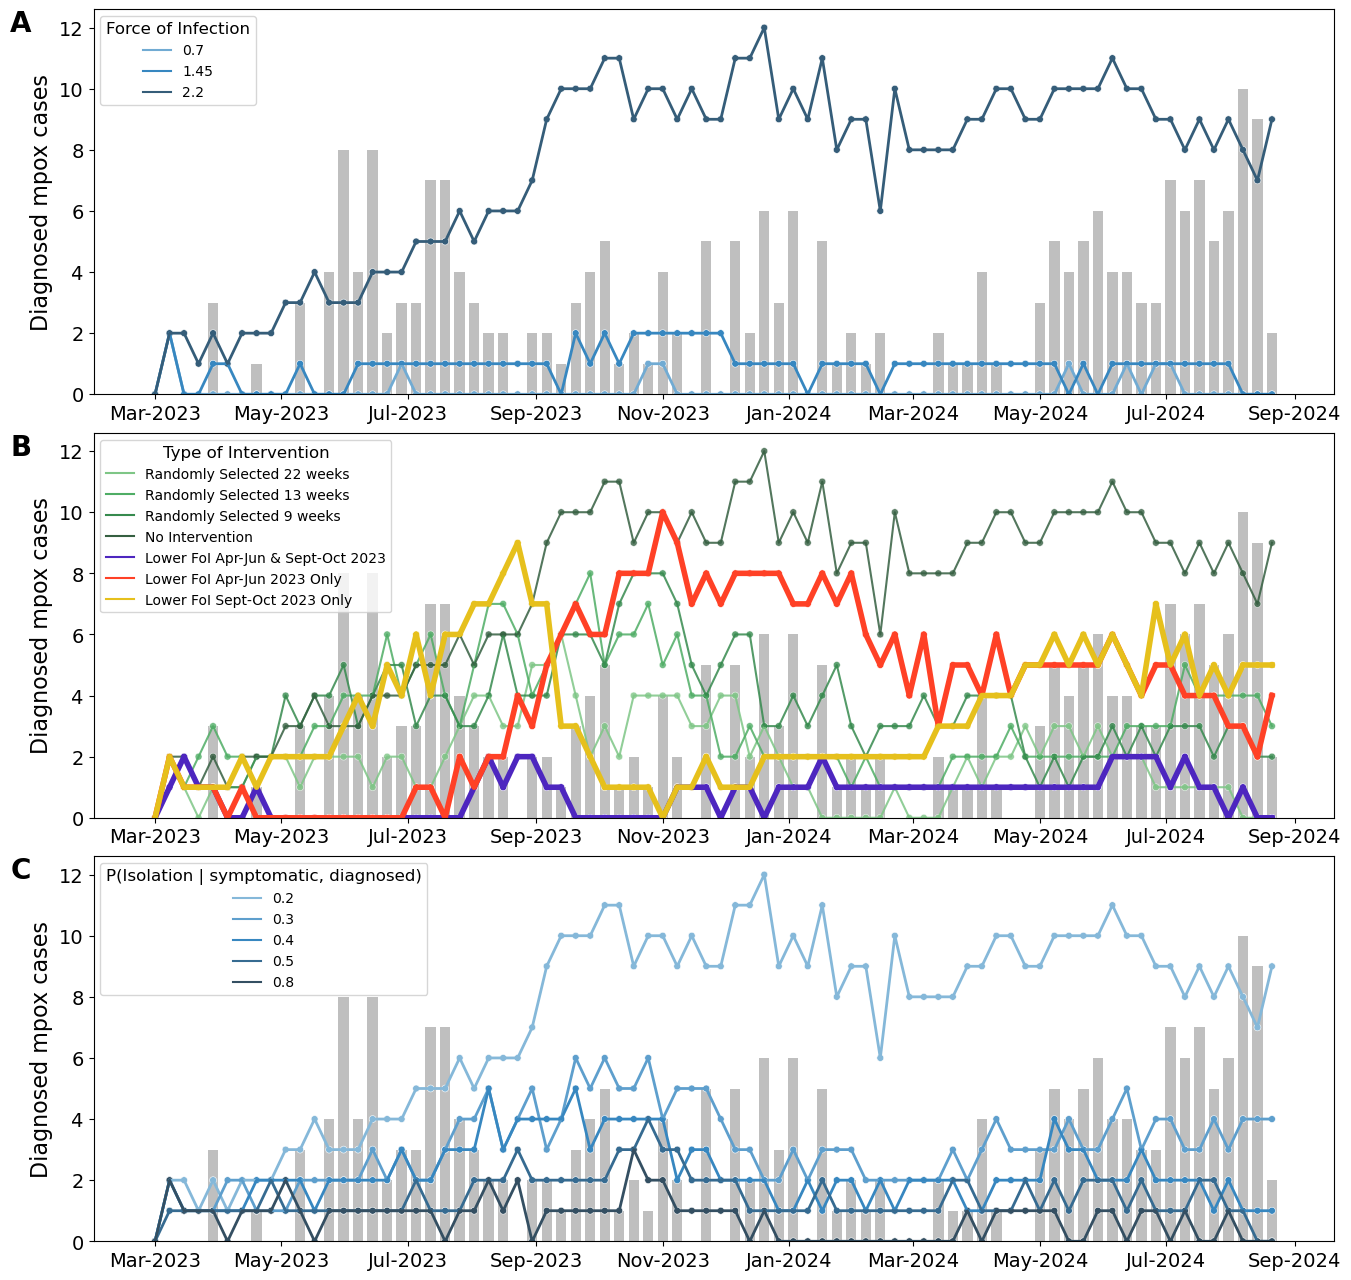

In [155]:
# Plotting FoI with phylo imports
fig = plt.figure(figsize=(16,16),facecolor='w')


#gs = GridSpec(2, 2, height_ratios=[6, 1], width_ratios=[0.25, 1], hspace=0.1)  
gs = GridSpec(3, 1,  hspace=0.1)  # Two rows, one column

# Add the first subplot 
ax1 = fig.add_subplot(gs[0])

sexual_behavior_long = pd.melt(modeling_df, id_vars='week_date', value_vars=['Empirical','To.Aware_S13', 'To.Aware_S12', 'To.Aware_S6'])
sexual_behavior_long.week_date = pd.to_datetime(sexual_behavior_long.week_date)

sexual_behavior_long.variable[sexual_behavior_long.variable == "Empirical"] = "Empirical"
sexual_behavior_long.variable[sexual_behavior_long.variable == "To.Aware_S13"] = "0.7"
sexual_behavior_long.variable[sexual_behavior_long.variable == "To.Aware_S12"] = "1.45"
sexual_behavior_long.variable[sexual_behavior_long.variable == "To.Aware_S6"] = "2.2"

#plot empirical cases
ax1.bar(sexual_behavior_long[sexual_behavior_long.variable == "Empirical"].week_date ,sexual_behavior_long[sexual_behavior_long.variable == "Empirical"].value, color = "gray", alpha = 0.5, width = 5)

#plot linegraph of simulated cases
sns.lineplot(
    data=sexual_behavior_long[sexual_behavior_long.variable != "Empirical"],
    x='week_date',
    y='value',
    hue='variable',
    palette='Blues_d',
    legend= "full", 
    linewidth = 2,
    ax = ax1
)

#plot scatter points of simulated cases on top of linegraph
sns.scatterplot(
    data=sexual_behavior_long[sexual_behavior_long.variable != "Empirical"],
    x='week_date',
    y='value',
    hue = "variable",
    palette = "Blues_d",
    s=25,  # Adjust point size
    marker='o', 
    legend = None, 
    ax = ax1
)

# Add the second subplot for the potential public health interventions based on phylo results
ax2 = fig.add_subplot(gs[1])

PH_import_intervention_long = pd.melt(modeling_df, id_vars='week_date', value_vars=['Empirical','To.Aware_S11', 'To.Aware_S15', 'To.Aware_S16','To.Aware_S17', 'To.Aware_S18', 'To.Aware_S19', 'To.Aware_S6'])
PH_import_intervention_long.week_date = pd.to_datetime(PH_import_intervention_long.week_date)

PH_import_intervention_long.variable[PH_import_intervention_long.variable == "Empirical"] = "Empirical"
PH_import_intervention_long.variable[PH_import_intervention_long.variable == "To.Aware_S11"] = "Lower FoI Apr-Jun & Sept-Oct 2023"
PH_import_intervention_long.variable[PH_import_intervention_long.variable == "To.Aware_S15"] = "Lower FoI Apr-Jun 2023 Only"
PH_import_intervention_long.variable[PH_import_intervention_long.variable == "To.Aware_S16"] = "Lower FoI Sept-Oct 2023 Only"
PH_import_intervention_long.variable[PH_import_intervention_long.variable == "To.Aware_S17"] = "Randomly Selected 22 weeks"
PH_import_intervention_long.variable[PH_import_intervention_long.variable == "To.Aware_S18"] = "Randomly Selected 13 weeks"
PH_import_intervention_long.variable[PH_import_intervention_long.variable == "To.Aware_S19"] = "Randomly Selected 9 weeks"
PH_import_intervention_long.variable[PH_import_intervention_long.variable == "To.Aware_S6"] = "No Intervention"


#plot empirical cases
ax2.bar(PH_import_intervention_long[PH_import_intervention_long.variable == "Empirical"].week_date ,PH_import_intervention_long[PH_import_intervention_long.variable == "Empirical"].value, color = "gray", alpha = 0.5, width = 5)

sensitivity_tests = ["Randomly Selected 22 weeks", "Randomly Selected 13 weeks", "Randomly Selected 9 weeks", "No Intervention"]

#plot linegraph of simulated cases
sns.lineplot(
    data=PH_import_intervention_long[(PH_import_intervention_long['variable'] != "Empirical") & (PH_import_intervention_long['variable'].isin(sensitivity_tests))],
    x='week_date',
    y='value',
    hue='variable',
    palette='Greens_d',
    alpha = 0.85,
    legend= "full", 
    ax = ax2
)

#plot scatter points of simulated cases on top of linegraph
sns.scatterplot(
    data=PH_import_intervention_long[(PH_import_intervention_long['variable'] != "Empirical") & (PH_import_intervention_long['variable'].isin(sensitivity_tests))],
    x='week_date',
    y='value',
    hue = "variable",
    palette = "Greens_d",
    s=25,  # Adjust point size
    marker='o', 
    alpha = 0.8,
    legend = None, 
    ax = ax2
)

sns.lineplot(
    data=PH_import_intervention_long[(PH_import_intervention_long['variable'] != "Empirical") & (~PH_import_intervention_long['variable'].isin(sensitivity_tests))],
    x='week_date',
    y='value',
    hue='variable',
    palette='CMRmap',
    dashes = True, 
    legend= "full", 
    linewidth = 4, #make the intervention lines of interest thicker so that they stand out
    ax = ax2
)

sns.scatterplot(
    data=PH_import_intervention_long[(PH_import_intervention_long['variable'] != "Empirical") & (~PH_import_intervention_long['variable'].isin(sensitivity_tests))],
    x='week_date',
    y='value',
    hue = "variable",
    palette = "CMRmap",
    s=25,  # Adjust point size
    marker='o', 
    alpha = 1,
    legend = None, 
    ax = ax2
)


# Add the third subplot 
ax3 = fig.add_subplot(gs[2])

long_prop_iso_df = pd.melt(modeling_df, id_vars='week_date', value_vars=["Empirical", 'To.Aware_S6', 'To.Aware_S5', "To.Aware_S4", "To.Aware_S3", "To.Aware_S14"])
long_prop_iso_df.week_date = pd.to_datetime(long_prop_iso_df.week_date)

# long_prop_iso_df.variable[long_prop_iso_df.variable == "To.Aware_S7"] = "0.0"
long_prop_iso_df.variable[long_prop_iso_df.variable == "To.Aware_S6"] = "0.2"
long_prop_iso_df.variable[long_prop_iso_df.variable == "To.Aware_S5"] = "0.3"
long_prop_iso_df.variable[long_prop_iso_df.variable == "To.Aware_S4"] = "0.4"
long_prop_iso_df.variable[long_prop_iso_df.variable == "To.Aware_S3"] = "0.5"
long_prop_iso_df.variable[long_prop_iso_df.variable == "To.Aware_S14"] = "0.8"


#plot empirical cases
ax3.bar(long_prop_iso_df[long_prop_iso_df.variable == "Empirical"].week_date ,long_prop_iso_df[long_prop_iso_df.variable == "Empirical"].value, color = "gray", alpha = 0.5, width = 5)

#plot linegraph of simulated cases
sns.lineplot(
    data=long_prop_iso_df[long_prop_iso_df.variable != "Empirical"],
    x='week_date',
    y='value',
    hue='variable',
    palette='Blues_d',
    legend= "full", 
    linewidth = 2,
    ax = ax3
)

#plot scatter points of simulated cases on top of linegraph
sns.scatterplot(
    data=long_prop_iso_df[long_prop_iso_df.variable != "Empirical"],
    x='week_date',
    y='value',
    hue = "variable",
    palette = "Blues_d",
    s=25,  # Adjust point size
    marker='o', 
    legend = None, 
    ax = ax3
)

ax1.legend(title = "Force of Infection", loc = "upper left")
ax2.legend(title = "Type of Intervention", loc = "upper left")
ax3.legend(title = "P(Isolation | symptomatic, diagnosed)", loc = "upper left")



# Format the x-axis for dates
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
# ax.xaxis.set_major_locator(mdates.DayLocator(interval=14))
#ax1.xticks(rotation=45)
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))

# Set axis labels
ax1.tick_params(axis='both', which='major', labelsize=14)
ax1.tick_params(axis='both', which='minor', labelsize=14)
ax1.set_ylabel('Diagnosed mpox cases', size = 16)
ax1.set_xlabel('')
ax2.tick_params(axis='both', which='major', labelsize=14)
ax2.tick_params(axis='both', which='minor', labelsize=14)
ax2.set_ylabel('Diagnosed mpox cases', size = 16)
ax2.set_xlabel('')
ax3.tick_params(axis='both', which='major', labelsize=14)
ax3.tick_params(axis='both', which='minor', labelsize=14)
ax3.set_ylabel('Diagnosed mpox cases', size = 16)
ax3.set_xlabel('')
#ax.set_ylim(0, 0.10)  # Y-axis limits

## add in letters for pub
ax1.text(-0.05, 1, "A", transform=ax1.transAxes, fontsize=20, fontweight='bold', va='top', ha='right')  
ax2.text(-0.05, 1, "B", transform=ax2.transAxes, fontsize=20, fontweight='bold', va='top', ha='right')  
ax3.text(-0.05, 1, "C", transform=ax3.transAxes, fontsize=20, fontweight='bold', va='top', ha='right')  


# Show the plot
plt.tight_layout()
plt.savefig('../figures/microsim_results.png',dpi=300,bbox_inches='tight')
plt.show()

In [156]:
### now plotting sensitivity analysis assuming 2X importations

In [157]:
modeling_2x_imports_df = pd.read_csv("../data/microsimulation_results/2Xscenarios_aware.csv")
modeling_2x_imports_df.head()


,week,Empirical,To.Aware_S1,To.Aware_S2,To.Aware_S3,To.Aware_S4,To.Aware_S5,To.Aware_S6,To.Aware_S7,To.Aware_S11,To.Aware_S12,To.Aware_S13
0,0,0.0,0,0,0,0,0,0,0,0,0,0
1,1,0.0,2,2,2,2,1,2,2,2,2,2
2,2,0.0,0,1,1,2,1,1,1,1,1,1
3,3,0.0,0,1,2,1,1,1,1,1,1,0
4,4,3.0,0,1,2,2,1,1,1,1,1,1


In [158]:
start_date = datetime(2023, 3, 1)
modeling_2x_imports_df['week_date'] = modeling_2x_imports_df['week'].apply(lambda x: (start_date + timedelta(weeks=x)).strftime('%Y-%m-%d'))
modeling_2x_imports_df = modeling_2x_imports_df.dropna()
modeling_2x_imports_df.head()

,week,Empirical,To.Aware_S1,To.Aware_S2,To.Aware_S3,To.Aware_S4,To.Aware_S5,To.Aware_S6,To.Aware_S7,To.Aware_S11,To.Aware_S12,To.Aware_S13,week_date
0,0,0.0,0,0,0,0,0,0,0,0,0,0,2023-03-01
1,1,0.0,2,2,2,2,1,2,2,2,2,2,2023-03-08
2,2,0.0,0,1,1,2,1,1,1,1,1,1,2023-03-15
3,3,0.0,0,1,2,1,1,1,1,1,1,0,2023-03-22
4,4,3.0,0,1,2,2,1,1,1,1,1,1,2023-03-29


/var/folders/h9/0347drb57tsgxzbddmvmlvf80000gp/T/ipykernel_59851/2234889189.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sexual_behavior_long.variable[sexual_behavior_long.variable == "Empirical"] = "Empirical"
/var/folders/h9/0347drb57tsgxzbddmvmlvf80000gp/T/ipykernel_59851/2234889189.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sexual_behavior_long.variable[sexual_behavior_long.variable == "To.Aware_S13"] = "0.7"
/var/folders/h9/0347drb57tsgxzbddmvmlvf80000gp/T/ipykernel_59851/2234889189.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats 

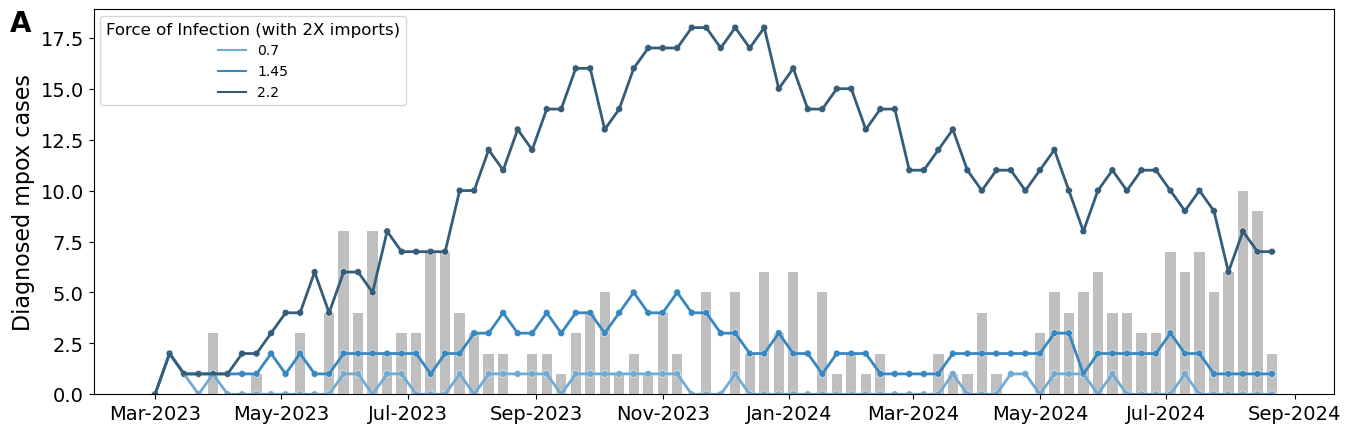

In [165]:
# Plotting FoI with phylo imports
fig = plt.figure(figsize=(16,16),facecolor='w')


#gs = GridSpec(2, 2, height_ratios=[6, 1], width_ratios=[0.25, 1], hspace=0.1)  
gs = GridSpec(3, 1,  hspace=0.1)  # Two rows, one column

# Add the first subplot 
ax1 = fig.add_subplot(gs[0])

sexual_behavior_long = pd.melt(modeling_2x_imports_df, id_vars='week_date', value_vars=['Empirical','To.Aware_S13', 'To.Aware_S12', 'To.Aware_S6'])
sexual_behavior_long.week_date = pd.to_datetime(sexual_behavior_long.week_date)

sexual_behavior_long.variable[sexual_behavior_long.variable == "Empirical"] = "Empirical"
sexual_behavior_long.variable[sexual_behavior_long.variable == "To.Aware_S13"] = "0.7"
sexual_behavior_long.variable[sexual_behavior_long.variable == "To.Aware_S12"] = "1.45"
sexual_behavior_long.variable[sexual_behavior_long.variable == "To.Aware_S6"] = "2.2"

#plot empirical cases
ax1.bar(sexual_behavior_long[sexual_behavior_long.variable == "Empirical"].week_date ,sexual_behavior_long[sexual_behavior_long.variable == "Empirical"].value, color = "gray", alpha = 0.5, width = 5)

#plot linegraph of simulated cases
sns.lineplot(
    data=sexual_behavior_long[sexual_behavior_long.variable != "Empirical"],
    x='week_date',
    y='value',
    hue='variable',
    palette='Blues_d',
    legend= "full", 
    linewidth = 2,
    ax = ax1
)

#plot scatter points of simulated cases on top of linegraph
sns.scatterplot(
    data=sexual_behavior_long[sexual_behavior_long.variable != "Empirical"],
    x='week_date',
    y='value',
    hue = "variable",
    palette = "Blues_d",
    s=25,  # Adjust point size
    marker='o', 
    legend = None, 
    ax = ax1
)


# # Add the second subplot 
# ax3 = fig.add_subplot(gs[1])

# long_prop_iso_df = pd.melt(modeling_2x_imports_df, id_vars='week_date', value_vars=["Empirical", 'To.Aware_S6', 'To.Aware_S5', "To.Aware_S4", "To.Aware_S3"])
# long_prop_iso_df.week_date = pd.to_datetime(long_prop_iso_df.week_date)

# # long_prop_iso_df.variable[long_prop_iso_df.variable == "To.Aware_S7"] = "0.0"
# long_prop_iso_df.variable[long_prop_iso_df.variable == "To.Aware_S6"] = "0.2"
# long_prop_iso_df.variable[long_prop_iso_df.variable == "To.Aware_S5"] = "0.3"
# long_prop_iso_df.variable[long_prop_iso_df.variable == "To.Aware_S4"] = "0.4"
# long_prop_iso_df.variable[long_prop_iso_df.variable == "To.Aware_S3"] = "0.5"
# #long_prop_iso_df.variable[long_prop_iso_df.variable == "To.Aware_S14"] = "0.8"


# #plot empirical cases
# ax3.bar(long_prop_iso_df[long_prop_iso_df.variable == "Empirical"].week_date ,long_prop_iso_df[long_prop_iso_df.variable == "Empirical"].value, color = "gray", alpha = 0.5, width = 5)

# #plot linegraph of simulated cases
# sns.lineplot(
#     data=long_prop_iso_df[long_prop_iso_df.variable != "Empirical"],
#     x='week_date',
#     y='value',
#     hue='variable',
#     palette='Blues_d',
#     legend= "full", 
#     linewidth = 2,
#     ax = ax3
# )

# #plot scatter points of simulated cases on top of linegraph
# sns.scatterplot(
#     data=long_prop_iso_df[long_prop_iso_df.variable != "Empirical"],
#     x='week_date',
#     y='value',
#     hue = "variable",
#     palette = "Blues_d",
#     s=25,  # Adjust point size
#     marker='o', 
#     legend = None, 
#     ax = ax3
# )

ax1.legend(title = "Force of Infection (with 2X imports)", loc = "upper left")
ax2.legend(title = "Type of Intervention", loc = "upper left")
ax3.legend(title = "P(Isolation | symptomatic, diagnosed)", loc = "upper left")



# Format the x-axis for dates
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
# ax.xaxis.set_major_locator(mdates.DayLocator(interval=14))
#ax1.xticks(rotation=45)
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))

# Set axis labels
ax1.tick_params(axis='both', which='major', labelsize=14)
ax1.tick_params(axis='both', which='minor', labelsize=14)
ax1.set_ylabel('Diagnosed mpox cases', size = 16)
ax1.set_xlabel('')
ax2.tick_params(axis='both', which='major', labelsize=14)
ax2.tick_params(axis='both', which='minor', labelsize=14)
ax2.set_ylabel('Diagnosed mpox cases', size = 16)
ax2.set_xlabel('')
ax3.tick_params(axis='both', which='major', labelsize=14)
ax3.tick_params(axis='both', which='minor', labelsize=14)
ax3.set_ylabel('Diagnosed mpox cases', size = 16)
ax3.set_xlabel('')
#ax.set_ylim(0, 0.10)  # Y-axis limits

## add in letters for pub
ax1.text(-0.05, 1, "A", transform=ax1.transAxes, fontsize=20, fontweight='bold', va='top', ha='right')  
ax2.text(-0.05, 1, "B", transform=ax2.transAxes, fontsize=20, fontweight='bold', va='top', ha='right')  
ax3.text(-0.05, 1, "C", transform=ax3.transAxes, fontsize=20, fontweight='bold', va='top', ha='right')  


# Show the plot
plt.tight_layout()
plt.savefig('../figures/microsim_results_2x_imports.png',dpi=300,bbox_inches='tight')
plt.show()